Joueur Bas

In [18]:
from smart.model import ModelJoueurConvolution
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
import matplotlib.pyplot as plt

In [19]:
# Config
NB_FRAMES = 30
WIDTH = 100
HEIGHT = 100
PATH_DATA = 'img/JBas'

In [20]:
layers = [
    tf.keras.Input(shape = (WIDTH, NB_FRAMES * HEIGHT, 3)), # 50, 15*50, 3
    Conv2D(filters=16, kernel_size=(3, 3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
        
    # Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
    # BatchNormalization(),
    # MaxPooling2D(pool_size=(2, 2)),
    # Dropout(0.2),
        
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
        
    Flatten(),
    # Dense(units=128, activation="relu"),
    Dense(units=4, activation="softmax"),
]

In [21]:
# Load the model
model = ModelJoueurConvolution.load_model_from_layers(layers)
model.summary_model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 2998, 16)      448       
                                                                 
 batch_normalization_2 (Batc  (None, 98, 2998, 16)     64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 1499, 16)     0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 49, 1499, 16)      0         
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 1497, 32)      4640      
                                                                 
 batch_normalization_3 (Batc  (None, 47, 1497, 32)    

In [22]:
list_videos, y = model.analyse_sequence_frame(PATH_DATA, nb_frame=NB_FRAMES)
list_videos

In [23]:
y = model.label_encoder(y)
y

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
# Split the data
X_train, y_train, X_test, y_test = model.split_train_test(list_videos, y, test_size=0.2,
                                        shape_frame=(WIDTH, HEIGHT, 3), nb_frame=NB_FRAMES)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((94, 100, 3000, 3), (94,), (24, 100, 3000, 3), (24,))

(array([31.,  0.,  0., 13.,  0.,  0., 33.,  0.,  0., 17.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

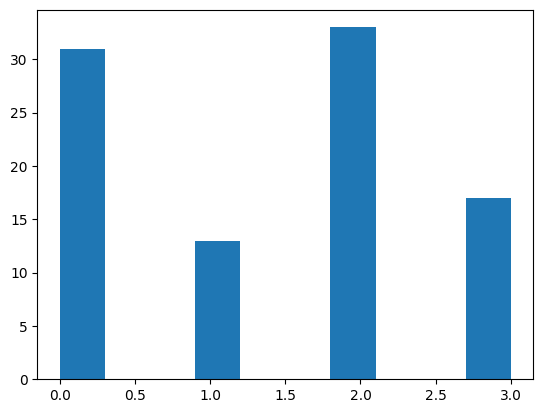

In [25]:
plt.hist(y_train)

In [26]:
# Train the model
history = model.train(X_train, y_train, epochs=5, batch_size=8)

Epoch 1/5
5/5 [==============================] - ETA: 0s - loss: 235.5655 - accuracy: 0.2933
Epoch 1: val_loss improved from inf to 1062.85742, saving model to checkpoints/Weights-001--1062.85742.hdf5
5/5 [==============================] - 14s 3s/step - loss: 235.5655 - accuracy: 0.2933 - val_loss: 1062.8574 - val_accuracy: 0.0000e+00
Epoch 2/5
5/5 [==============================] - ETA: 0s - loss: 41.2802 - accuracy: 0.7867
Epoch 2: val_loss improved from 1062.85742 to 183.74046, saving model to checkpoints/Weights-002--183.74046.hdf5
5/5 [==============================] - 12s 2s/step - loss: 41.2802 - accuracy: 0.7867 - val_loss: 183.7405 - val_accuracy: 0.0000e+00
Epoch 3/5
5/5 [==============================] - ETA: 0s - loss: 0.2382 - accuracy: 0.9733
Epoch 3: val_loss did not improve from 183.74046
5/5 [==============================] - 13s 3s/step - loss: 0.2382 - accuracy: 0.9733 - val_loss: 212.2291 - val_accuracy: 0.0000e+00
Epoch 4/5
5/5 [==============================] - ET

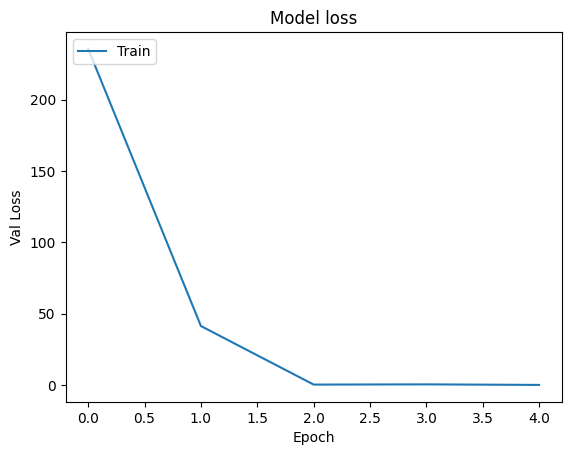

In [27]:
# Visualisation
plt.plot(history.history['loss'])
plt.title('Model loss')  
plt.ylabel('Val Loss')  
plt.xlabel('Epoch')  
plt.legend(['Train'], loc='upper left')  
plt.show()

In [28]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 1s 943ms/step - loss: 90.5001 - accuracy: 0.4167
Loss:  90.5001220703125
Accuracy:  0.4166666567325592


[90.5001220703125, 0.4166666567325592]

In [29]:
model.save_model('saved_models/model_joueur_bas_convolution_JQI.h5')